## Load workspace

In [1]:
#save.image(file = "DESeq2_notebook.RData")
load("DESeq2_trimmed_notebook_CELseq_vangl2.RData")

## Load libraries

In [2]:
suppressPackageStartupMessages({library(Rsubread)
                                library(DESeq2)
                                library("dplyr")
                                library("ggplot2")
                                library("pheatmap")
                                library("RColorBrewer")
                                library(AnnotationDbi)
                                library(org.Dr.eg.db)
                                library(repr)
                                library(topGO)
                                library(GOstats)
                               })

library(GOstats)


groupGOTerms: 	GOBPTerm, GOMFTerm, GOCCTerm environments built.



In [3]:
# set size of plot windows
options(repr.plot.width=12, repr.plot.height=10)

Did not remove duplicated reads although there are UMIs general advice from Anika is that these haven't been useful in bulk as they saturate quickly. #may check eventually if this is the case here when we have low read recover.
Reads were mapped to danrer11 with STAR.
Here following the RNA-seq workflow from bioconductor: https://www.bioconductor.org/packages/devel/workflows/vignettes/rnaseqGene/inst/doc/rnaseqGene.html

## Rsubread
First create count matrix with Rsubread: https://bioconductor.org/packages/3.12/bioc/vignettes/Rsubread/inst/doc/Rsubread.pdf

ThefeatureCountsfunction  is  a  general-purpose  read  summarization  function  thatassigns mapped reads (RNA-seq or gDNA-seq reads) to genomic features such as genes,exons, promoters, gene bodies and genomic windows.This function takes as input a set of files that contain read mapping results and anannotation file that includes genomic features.  It automatically detects the format ofinput read files (supported formats include SAM and BAM). Input reads can be name-sorted or location-sorted.  Users do not need to resort the reads before feeding them to featureCounts.

In [4]:
#?list.files
#bamfiles<-list.files(path= "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed", pattern= "*/*.Aligned.out.bam", full.names=TRUE, recursive=TRUE)
bamfiles<-c(
    '/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample14/sample14.Aligned.out.bam',
    '/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample15/sample15.Aligned.out.bam',
    '/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample16/sample16.Aligned.out.bam',
    '/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample17/sample17.Aligned.out.bam',
    '/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample18/sample18.Aligned.out.bam',
    '/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample19/sample19.Aligned.out.bam',
    '/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample20/sample20.Aligned.out.bam',
    '/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample21/sample21.Aligned.out.bam',
    '/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample22/sample22.Aligned.out.bam',
    '/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample23/sample23.Aligned.out.bam',
    '/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample24/sample24.Aligned.out.bam'
    )

In [5]:
bamfiles

[1] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample14/sample14.Aligned.out.bam"
 [2] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample15/sample15.Aligned.out.bam"
 [3] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample16/sample16.Aligned.out.bam"
 [4] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample17/sample17.Aligned.out.bam"
 [5] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample18/sample18.Aligned.out.bam"
 [6] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample19/sample19.Aligned.out.bam"
 [7] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample20/sample20.Aligned.out.bam"
 [8] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample21/sample21.Aligned.out.bam"
 [9] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample22/sample22.Aligned.out.bam"
[10] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample23/sample23.Aligned.out.bam"
[11] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample24/sample24.Aligned.out.bam"

In [6]:
mycounts <- featureCounts(bamfiles, annot.ext="/fast/AG_Ohler/Alison/reference_genomes/danrer11/Danio_rerio.GRCz11.100.gtf", isGTFAnnotationFile=TRUE, isPairedEnd=FALSE, countMultiMappingReads = FALSE)


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
       Rsubread 2.3.9

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 11 BAM files                                     ||
||                                                                            ||
||                           sample14.Aligned.out.bam                         ||
||                           sample15.Aligned.out.bam                         ||
||                           sample16.Aligned.out.bam

In [7]:
#summary(mycounts)
#dim(mycounts$counts)
#head(mycounts$annotation)
#mycounts$targets
#mycounts$stat

## Import count matrix into DESeq2
Now import count matrix into DESeq2 with DESeqDataSetFromMatrix (see 3.2 Starting from count matrices)
Batches were given by Anne Merks. Could be divided based on embryonic clutches but this is unbalanced for the second expt because different embryonic lines were used, and also when the experiment was performed.
Experiment batches won't be used for selection of DE genes so can't be included in design formula. Decide whether it is better to analyse them separately or all together (first inclination is together, to allow more borrowed information).

In [8]:
countData<-mycounts$counts
colData<-read.csv("/fast/AG_Ohler/Alison/panakova_CM_RNAseq/mapped_trimmed_samplesheet_batches.txt", sep="\t", header=TRUE)
colData<-colData[colData$condition=="wt" | colData$condition=="vangl2",]
colData

,path,samplename,condition,embryo_batch,expt_batch
,<chr>,<chr>,<chr>,<chr>,<chr>
4,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample14/sample14.Aligned.out.bam,sample14,wt,vangl2_expt_batch1,vangl2_expt
5,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample15/sample15.Aligned.out.bam,sample15,wt,vangl2_expt_batch1,vangl2_expt
6,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample16/sample16.Aligned.out.bam,sample16,wt,vangl2_expt_batch1,vangl2_expt
7,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample17/sample17.Aligned.out.bam,sample17,wt,vangl2_expt_batch1,vangl2_expt
8,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample18/sample18.Aligned.out.bam,sample18,wt,vangl2_expt_batch1,vangl2_expt
9,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample19/sample19.Aligned.out.bam,sample19,vangl2,vangl2_expt_batch2,vangl2_expt
11,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample20/sample20.Aligned.out.bam,sample20,vangl2,vangl2_expt_batch2,vangl2_expt
12,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample21/sample21.Aligned.out.bam,sample21,vangl2,vangl2_expt_batch2,vangl2_expt
13,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample22/sample22.Aligned.out.bam,sample22,vangl2,vangl2_expt_batch2,vangl2_expt


In [9]:
dds <- DESeqDataSetFromMatrix(countData = countData,
                                 colData = colData,
                                 design = ~ condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [10]:
colData(dds)

DataFrame with 11 rows and 5 columns
                                           path  samplename condition
                                    <character> <character>  <factor>
sample14.Aligned.out.bam /fast/AG_Ohler/Aliso..    sample14    wt    
sample15.Aligned.out.bam /fast/AG_Ohler/Aliso..    sample15    wt    
sample16.Aligned.out.bam /fast/AG_Ohler/Aliso..    sample16    wt    
sample17.Aligned.out.bam /fast/AG_Ohler/Aliso..    sample17    wt    
sample18.Aligned.out.bam /fast/AG_Ohler/Aliso..    sample18    wt    
sample19.Aligned.out.bam /fast/AG_Ohler/Aliso..    sample19    vangl2
sample20.Aligned.out.bam /fast/AG_Ohler/Aliso..    sample20    vangl2
sample21.Aligned.out.bam /fast/AG_Ohler/Aliso..    sample21    vangl2
sample22.Aligned.out.bam /fast/AG_Ohler/Aliso..    sample22    vangl2
sample23.Aligned.out.bam /fast/AG_Ohler/Aliso..    sample23    vangl2
sample24.Aligned.out.bam /fast/AG_Ohler/Aliso..    sample24    vangl2
                               embryo_batch  expt_bat

## Exploratory analysis and visualization

### Prefiltering the dataset
Removing rows with no counts or only a single count across all samples.
NB may come back and adjust this

In [11]:
nrow(dds)

[1] 32520

In [12]:
keep <- rowSums(counts(dds)) > 1
# at least 3 samples with a count of 10 or higher
#keep <- rowSums(counts(dds) >= 1) >= 3
dds <- dds[keep,]
nrow(dds)

[1] 21196

### select samples with significant counts
Without any filtering of samples with low counts - samples 2, 5, 23, 3, 9, 14, 21, 22 cluster separately.

In [13]:
colSums(counts(dds))

sample14.Aligned.out.bam sample15.Aligned.out.bam sample16.Aligned.out.bam 
                   23433                  1860927                   440512 
sample17.Aligned.out.bam sample18.Aligned.out.bam sample19.Aligned.out.bam 
                 1793477                  1475576                   697918 
sample20.Aligned.out.bam sample21.Aligned.out.bam sample22.Aligned.out.bam 
                 1437012                     1033                      637 
sample23.Aligned.out.bam sample24.Aligned.out.bam 
                    6408                  1092987

In [14]:
colSums(counts(dds[,colSums(counts(dds)) < 150000]))

sample14.Aligned.out.bam sample21.Aligned.out.bam sample22.Aligned.out.bam 
                   23433                     1033                      637 
sample23.Aligned.out.bam 
                    6408

The above samples that clustered separately all have low readcounts, and very poor general QC, such as read quality etc. If I don't remove these samples with low counts, I only see 129 bled vs dmso genes and 1 vangl2 vs wt gene

[Sample 16 was clustering separately and had lowest read count. If I adjust this  read count barrier from 150,000 to 500,000 reads will it improve the number of DE genes?]

In [15]:
keep2 <- colSums(counts(dds)) > 150000
dds <- dds[,keep2]
ncol(dds)

[1] 7

Sample 19 should also be removed. It was one of the non-standard barcodes that had one basepair mismatch with sample19's expected barcoed. However the read quality is poor, and it clusters with the dmso samples rather than the vangl samples so it should be removed as it may introduce erronious DE genes.

In [16]:
keep3 <- colnames(dds) != "sample19.Aligned.out.bam"
keep3
dds <- dds[,keep3]
ncol(dds)

[1]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE

[1] 6

##  The variance stabilizing transformation and the rlog

Normalization here is aimed to stabilise the variance across the mean, for the purposes of plotting. If you just take counts, the largest counts have the highest absolute variance. If you take log2+1 of counts, the smaller counts will be over-represented in the variance.
DESeq2 has two methods to deal with this now - VST and rlog.
The rlog tends to work well on small datasets (n < 30), potentially outperforming the VST when there is a wide range of sequencing depth across samples (an order of magnitude difference).
=> Use rlog here, but it takes longer to compute

In [17]:
vsd <- vst(dds, blind = FALSE) # can try blind=TRUE for completely unsupervised
head(assay(vsd), 3)

,sample15.Aligned.out.bam,sample16.Aligned.out.bam,sample17.Aligned.out.bam,sample18.Aligned.out.bam,sample20.Aligned.out.bam,sample24.Aligned.out.bam
ENSDARG00000098311,7.230133,7.047565,7.192835,7.162757,7.164353,7.047565
ENSDARG00000104839,7.047565,7.239257,7.047565,7.047565,7.047565,7.047565
ENSDARG00000102474,7.792510,7.933360,7.737943,7.652815,7.722562,7.839885


In [18]:
rld <- rlog(dds, blind = FALSE) # can try blind=TRUE for completely unsupervised
head(assay(rld), 3)

,sample15.Aligned.out.bam,sample16.Aligned.out.bam,sample17.Aligned.out.bam,sample18.Aligned.out.bam,sample20.Aligned.out.bam,sample24.Aligned.out.bam
ENSDARG00000098311,-0.0629682,-0.09706908,-0.07811885,-0.08801147,-0.08755057,-0.1030653
ENSDARG00000104839,-1.9929444,-1.96681684,-1.99337009,-1.99149947,-1.99127433,-1.9892894
ENSDARG00000102474,5.1258291,5.27231808,5.05098146,4.94283438,5.03299126,5.1847078


Warning message:
“`as_data_frame()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


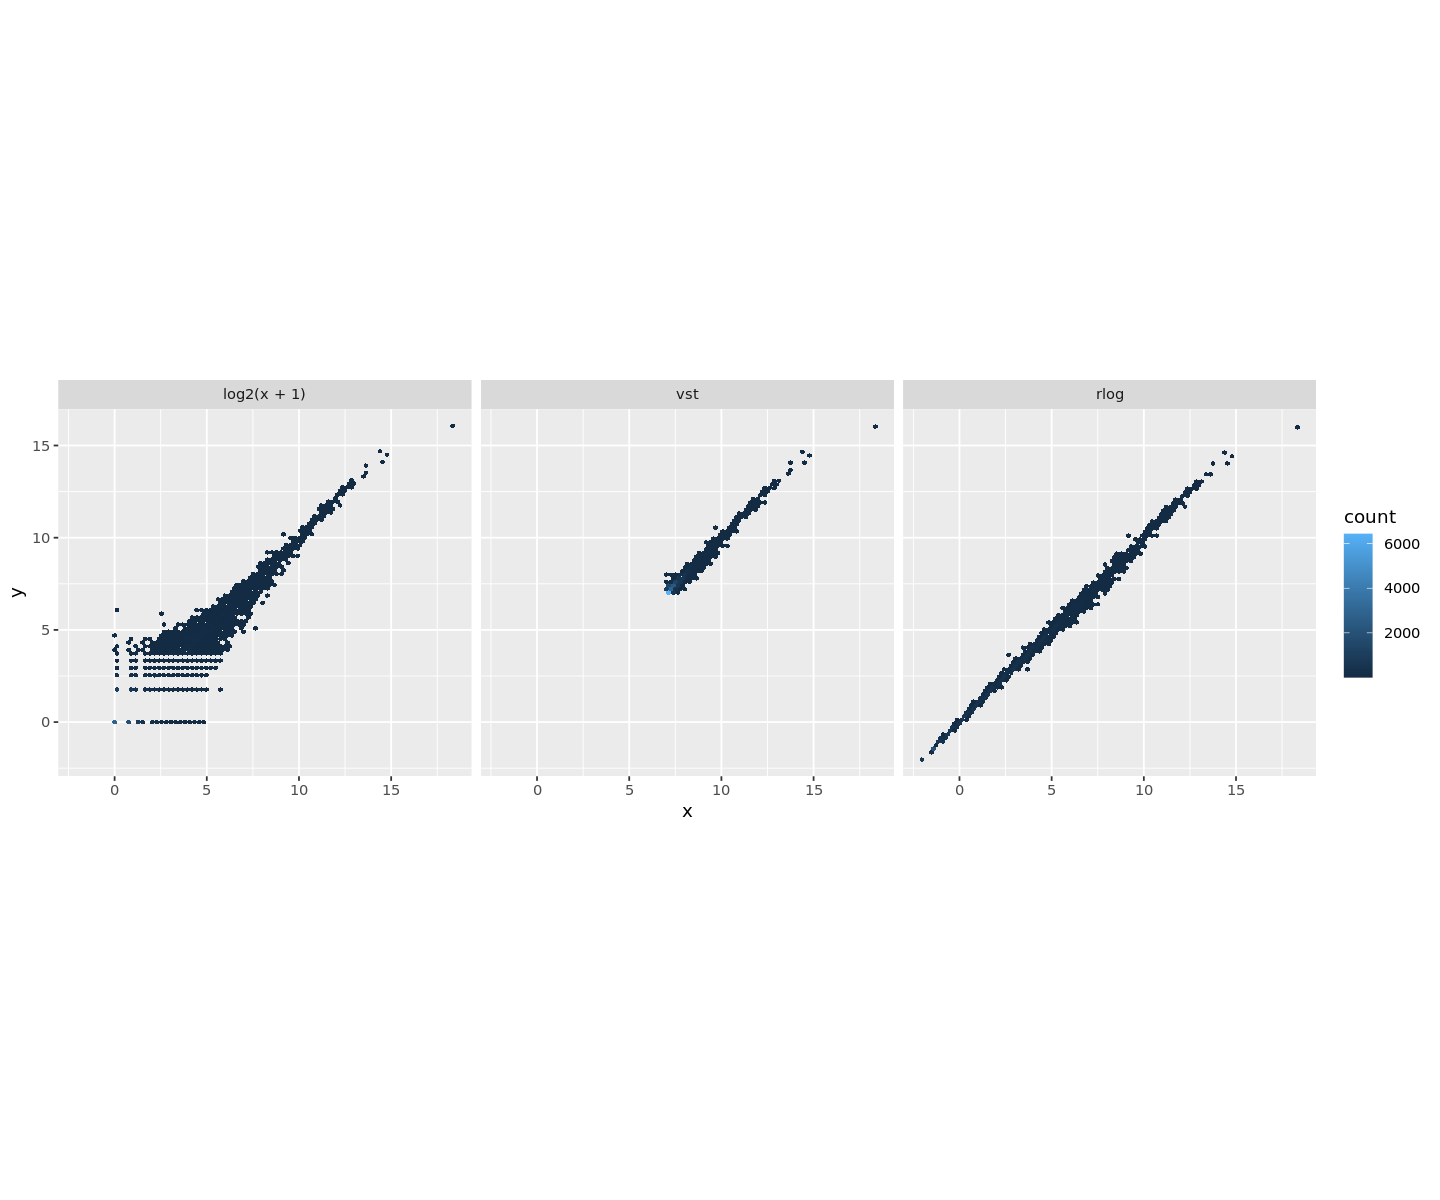

In [19]:
library("dplyr")
library("ggplot2")

dds <- estimateSizeFactors(dds)

df <- bind_rows(
  as_data_frame(log2(counts(dds, normalized=TRUE)[, 1:2]+1)) %>%
         mutate(transformation = "log2(x + 1)"),
  as_data_frame(assay(vsd)[, 1:2]) %>% mutate(transformation = "vst"),
  as_data_frame(assay(rld)[, 1:2]) %>% mutate(transformation = "rlog"))
  
colnames(df)[1:2] <- c("x", "y")  

lvls <- c("log2(x + 1)", "vst", "rlog")
df$transformation <- factor(df$transformation, levels=lvls)

ggplot(df, aes(x = x, y = y)) + geom_hex(bins = 80) +
  coord_fixed() + facet_grid( . ~ transformation)  

In [20]:
sampleDists <- dist(t(assay(vsd)))
#sampleDists

In [21]:
library("pheatmap")
library("RColorBrewer")

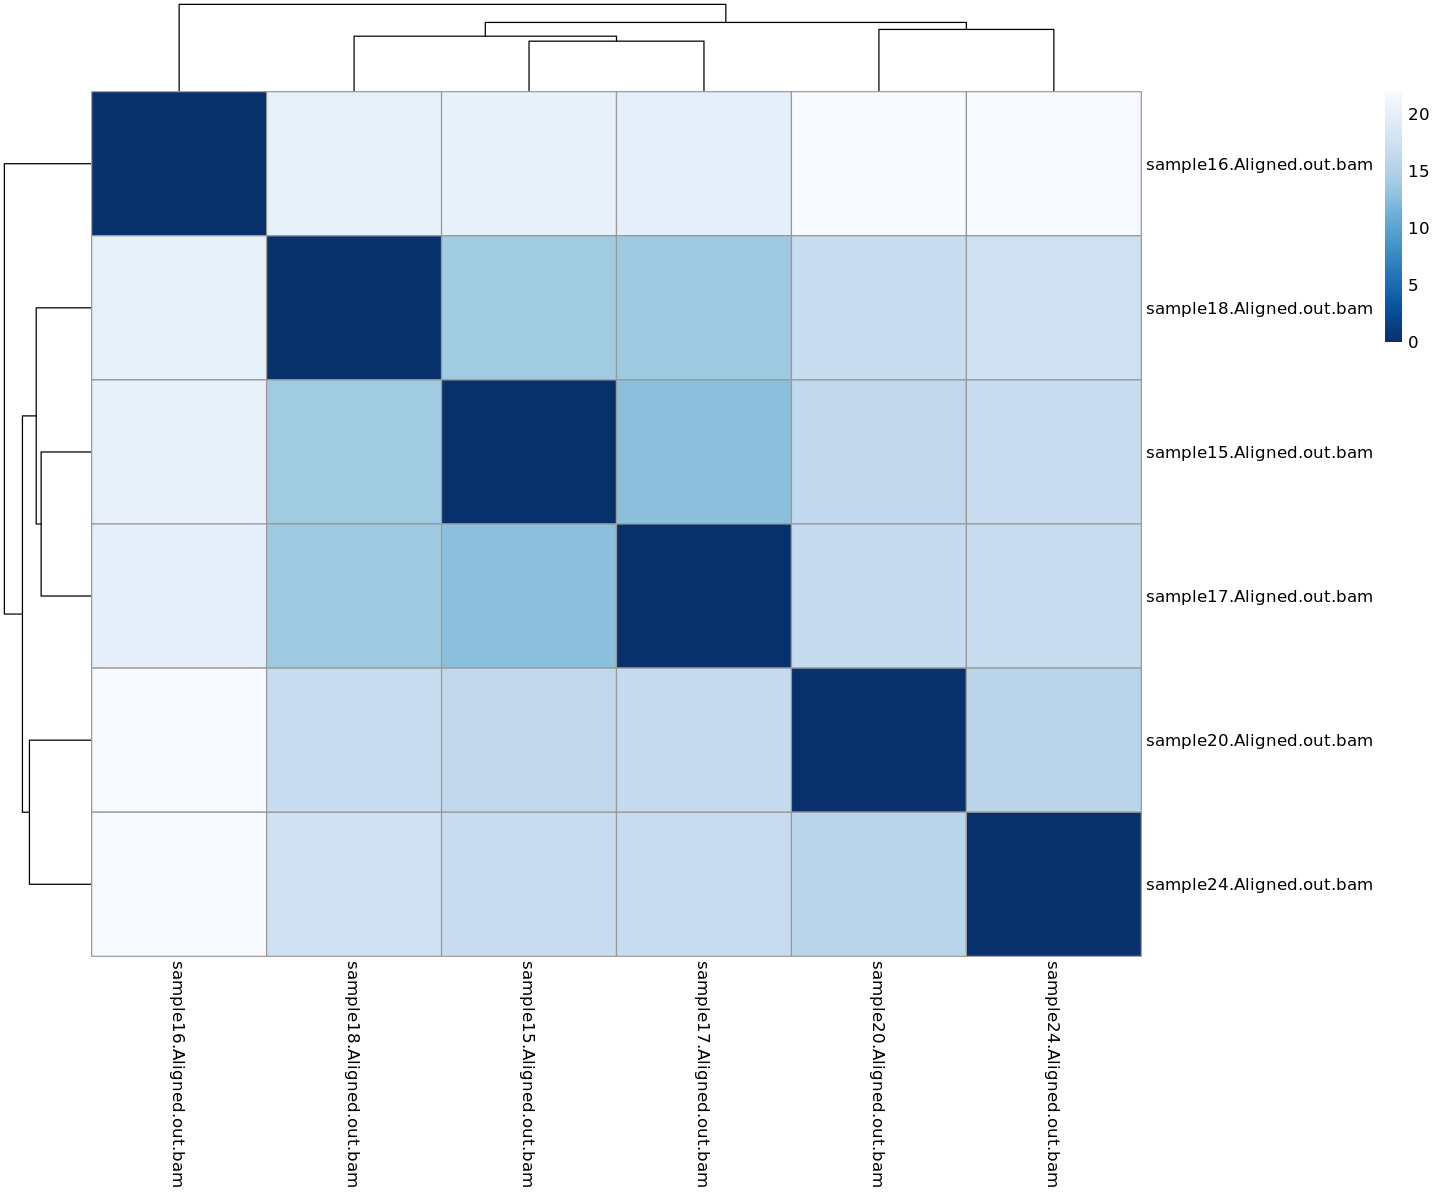

In [22]:
sampleDistMatrix <- as.matrix( sampleDists )
#rownames(sampleDistMatrix) <- paste( vsd$dex, vsd$cell, sep = " - " )
#colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors)

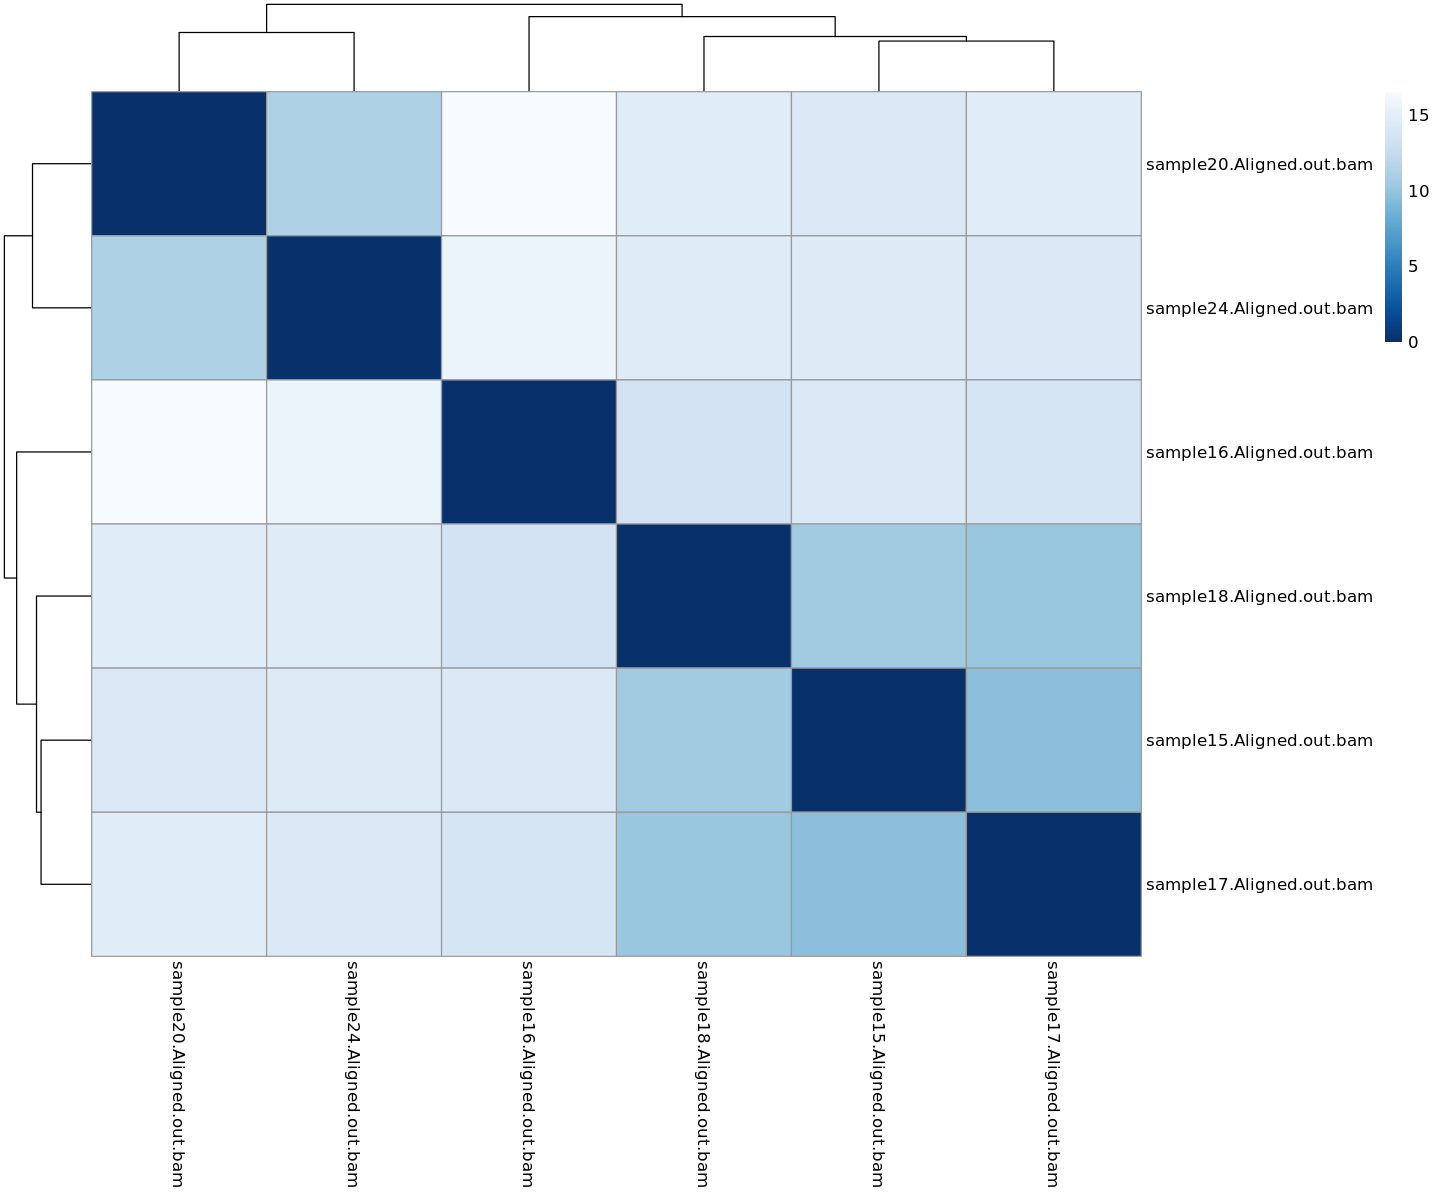

In [23]:
sampleDists_rld <- dist(t(assay(rld)))
sampleDistMatrix_rld <- as.matrix( sampleDists_rld )
#rownames(sampleDistMatrix) <- paste( vsd$dex, vsd$cell, sep = " - " )
#colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix_rld,
         clustering_distance_rows = sampleDists_rld,
         clustering_distance_cols = sampleDists_rld,
         col = colors)

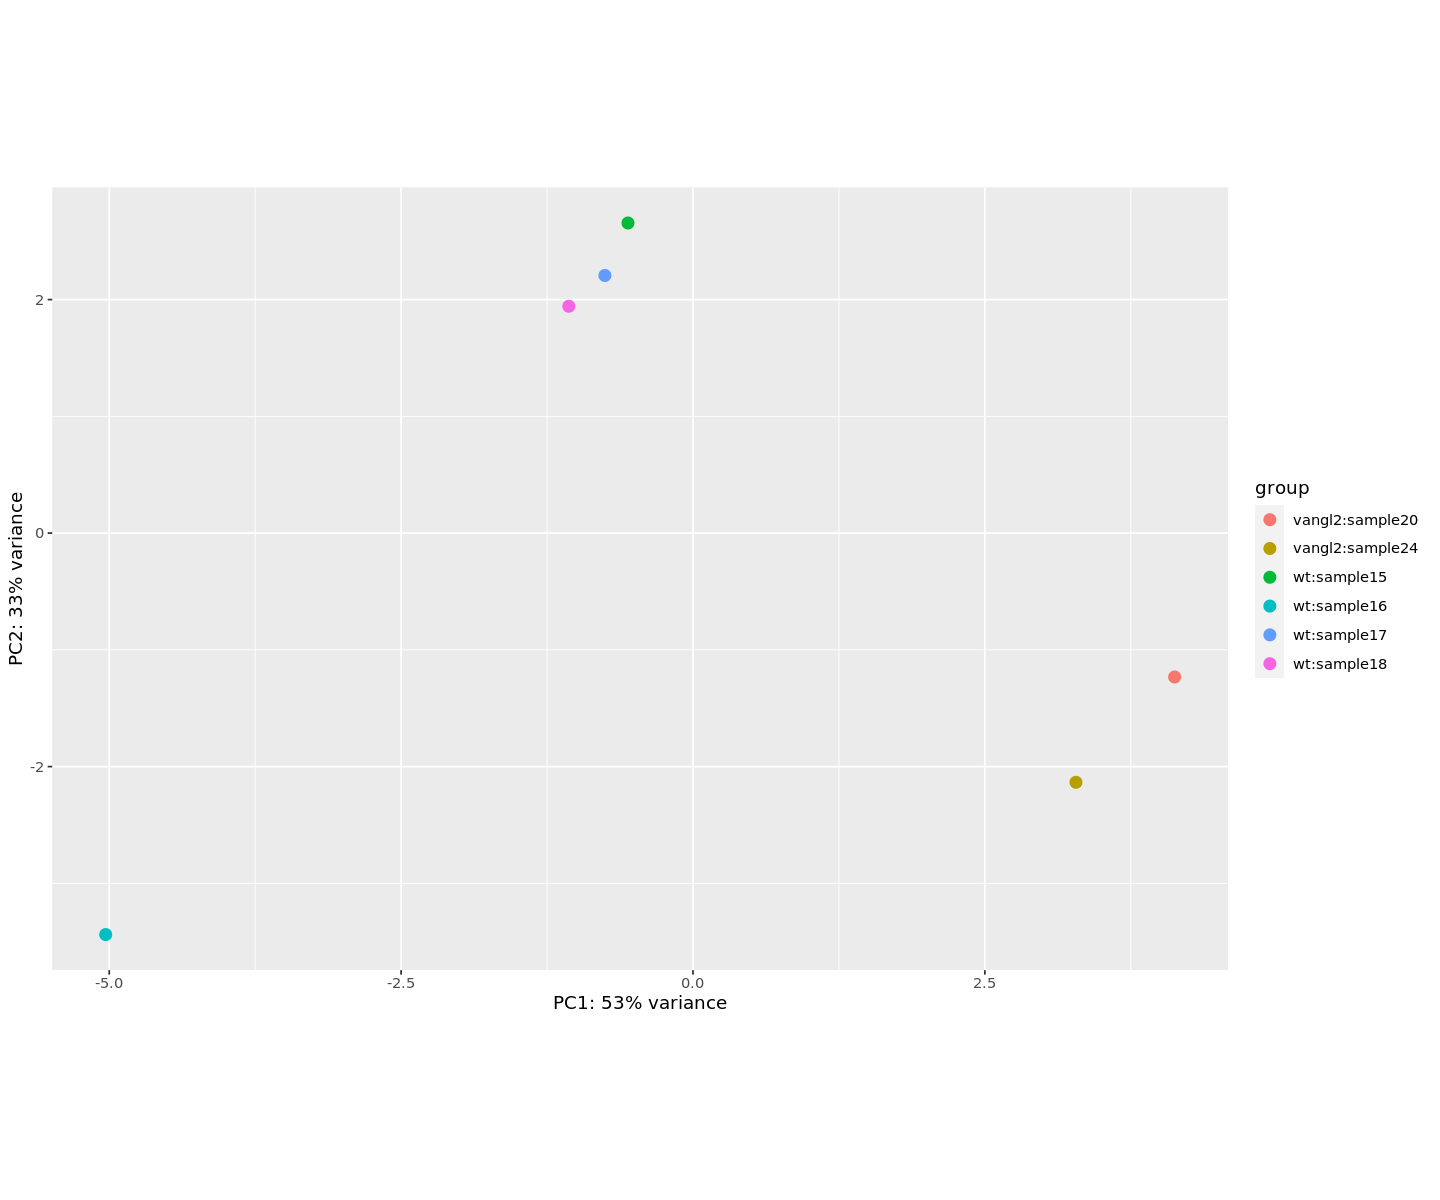

In [24]:
plotPCA(vsd, intgroup=c("condition","samplename"))
# add sample names

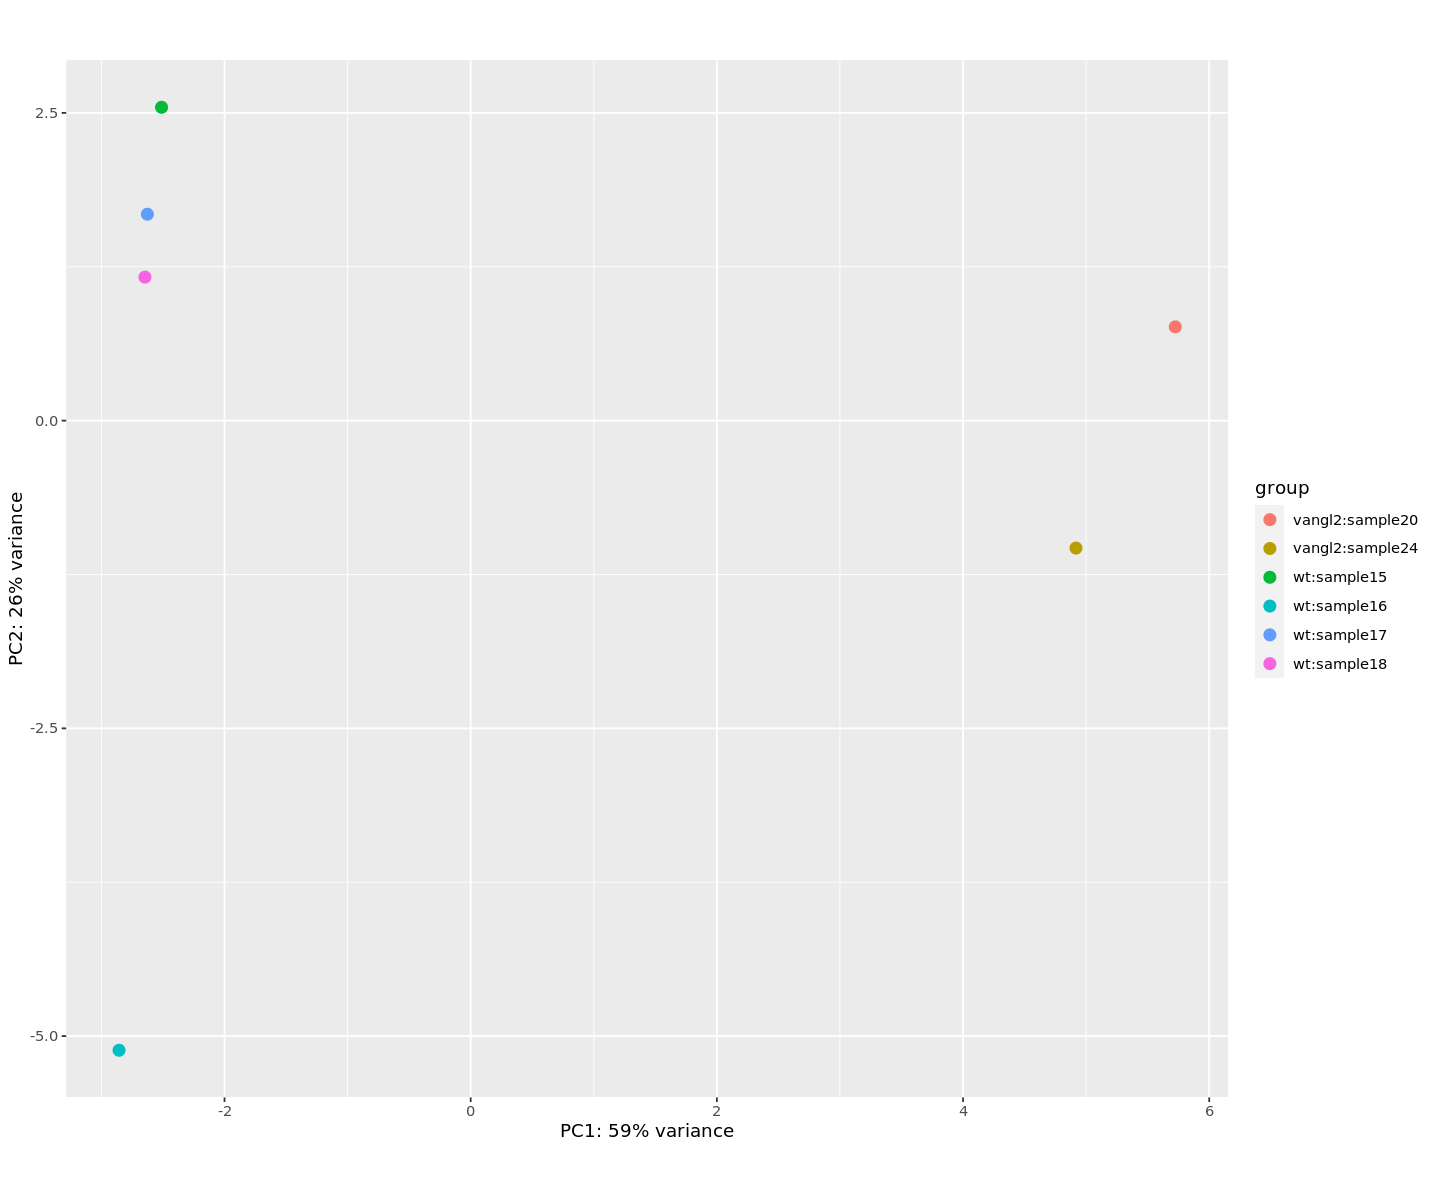

In [25]:
plotPCA(rld, intgroup=c("condition","samplename"))

## Differential expression analysis
As we have already specified an experimental design when we created the DESeqDataSet, we can run the differential expression pipeline on the raw counts with a single call to the function DESeq:

This function will print out a message for the various steps it performs. These are described in more detail in the manual page for DESeq, which can be accessed by typing ?DESeq. Briefly these are: the estimation of size factors (controlling for differences in the sequencing depth of the samples), the estimation of dispersion values for each gene, and fitting a generalized linear model.

A DESeqDataSet is returned that contains all the fitted parameters within it, and the following section describes how to extract out results tables of interest from this object.

In [26]:
dds <- DESeq(dds)

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



### select significant genes between vangl2 and wt
If I don't filter out samples with low counts, only get 1 DE gene

In [27]:
res_vangl2 <- results(dds, contrast=c("condition","vangl2","wt"))

In [28]:
#sum(res_vangl2$padj < 0.05, na.rm=TRUE)
resSig_vangl2 <- subset(res_vangl2, padj < 0.05)
resSig_vangl2 <- subset(resSig_vangl2, abs(log2FoldChange) > 1)
dim(resSig_vangl2)
sum(resSig_vangl2$log2FoldChange > 1, na.rm=TRUE)
sum(resSig_vangl2$log2FoldChange < -1, na.rm=TRUE)

[1] 22  6

[1] 7

[1] 15

In [29]:
#resSig_vangl2 <- subset(res_vangl2, padj < 0.1)
head(resSig_vangl2[ order(-resSig_vangl2$log2FoldChange), ])

log2 fold change (MLE): condition vangl2 vs wt 
Wald test p-value: condition vangl2 vs wt 
DataFrame with 6 rows and 6 columns
                    baseMean log2FoldChange     lfcSE      stat      pvalue
                   <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSDARG00000042245  214.5440        1.40324 0.1838819   7.63121 2.32559e-14
ENSDARG00000020574  220.9222        1.13307 0.1634385   6.93269 4.12925e-12
ENSDARG00000099197  496.8478        1.02158 0.1213644   8.41749 3.84634e-17
ENSDARG00000104682  221.7615        1.01405 0.1589159   6.38103 1.75901e-10
ENSDARG00000099959   80.1605        1.01052 0.2411017   4.19126 2.77413e-05
ENSDARG00000088330  712.2473        1.00874 0.0977768  10.31673 5.92055e-25
                          padj
                     <numeric>
ENSDARG00000042245 3.41861e-12
ENSDARG00000020574 3.79375e-10
ENSDARG00000099197 9.42353e-15
ENSDARG00000104682 1.23131e-08
ENSDARG00000099959 6.34291e-04
ENSDARG00000088330 2.17580e-22

#### Annotate sig genes between vang and wt

In [30]:
ens.str <- substr(rownames(res_vangl2), 1, length(rownames(res_vangl2)))
res_vangl2$symbol <- mapIds(org.Dr.eg.db,
                     keys=ens.str,
                     column="SYMBOL",
                     keytype="ENSEMBL",
                     multiVals="first")
res_vangl2$entrez <- mapIds(org.Dr.eg.db,
                     keys=ens.str,
                     column="ENTREZID",
                     keytype="ENSEMBL",
                     multiVals="first")

'select()' returned 1:many mapping between keys and columns

'select()' returned 1:many mapping between keys and columns



In [31]:
resSig_vangl2 <- subset(res_vangl2, padj < 0.05)
resSig_vangl2 <- subset(resSig_vangl2, abs(log2FoldChange) > 1)
#head(resSig_vangl2[ order(-resSig_vangl2$log2FoldChange), ], 10)
#head(resSig_vangl2[ order(resSig_vangl2$log2FoldChange), ], 10)

In [32]:
topBotDEGenes_vangl2<-rbind(head(resSig_vangl2[ order(-resSig_vangl2$log2FoldChange), ], 15),
                       head(resSig_vangl2[ order(resSig_vangl2$log2FoldChange), ], 15))

In [33]:
vangl2wt_samples<-colData(vsd)[vsd$condition == "vangl2" | vsd$condition == "wt",]

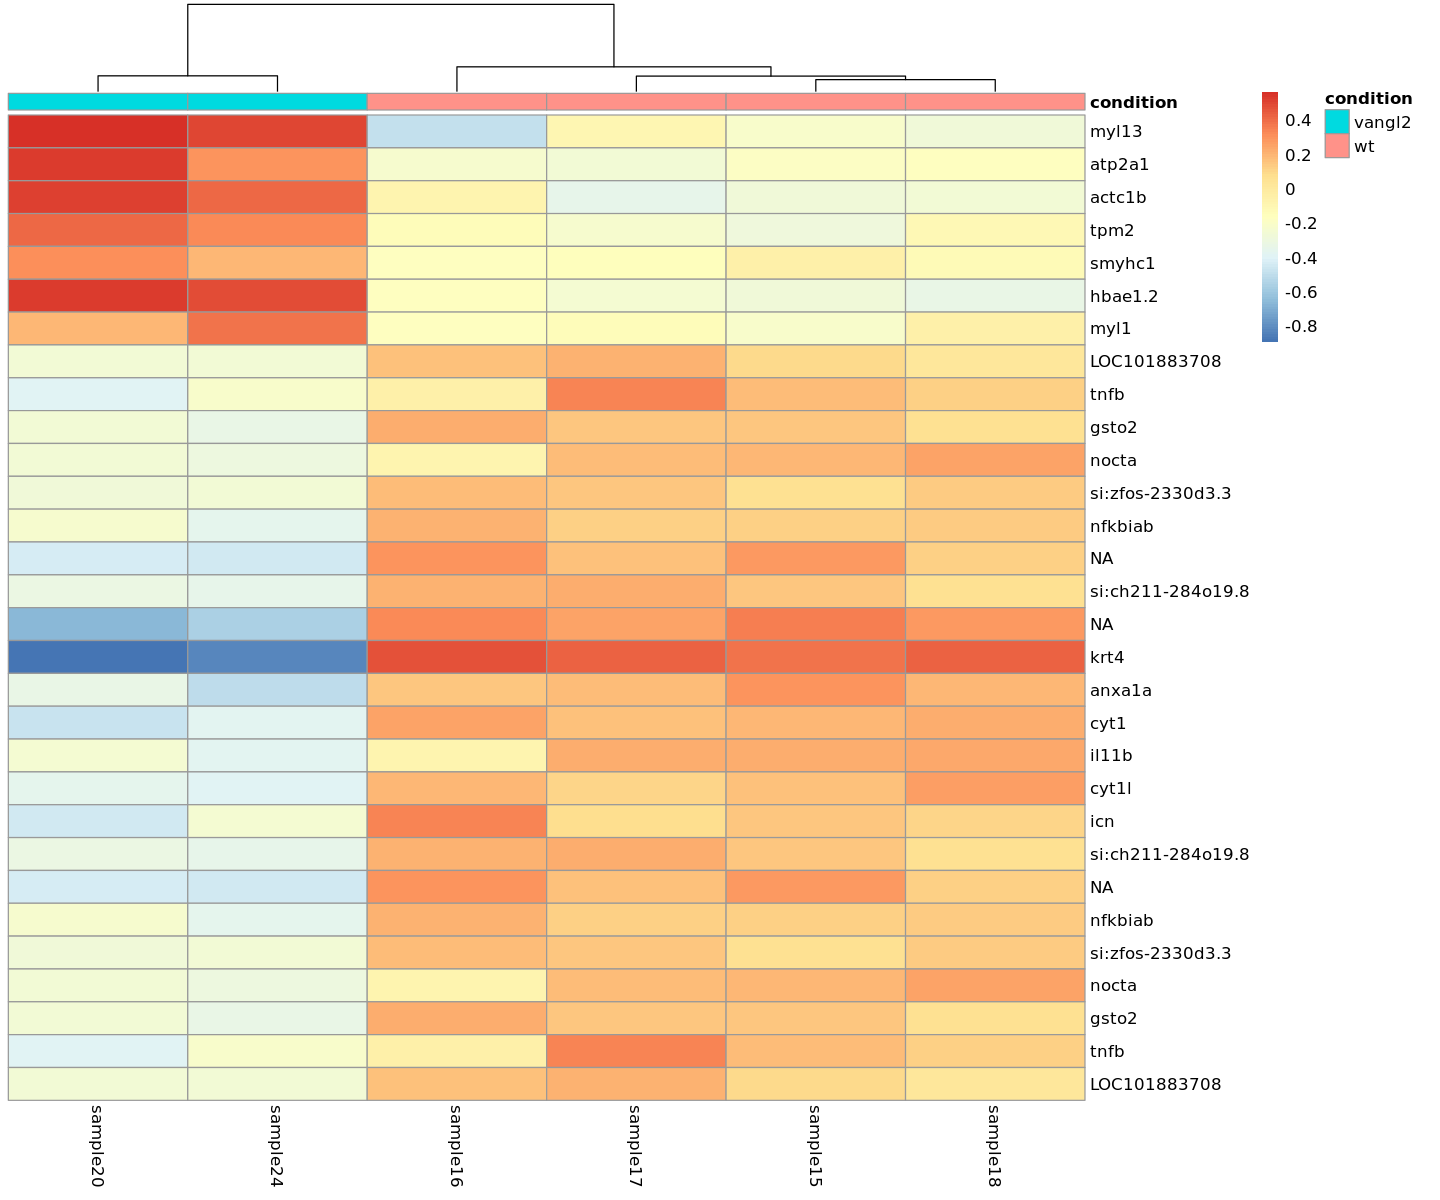

In [34]:
pretty_heatmap<-function(topBotDEGenes, samples, filename){
    mat<-(assay(vsd)[rownames(topBotDEGenes), rownames(samples)])
    mat  <- mat - rowMeans(mat)
    anno <- as.data.frame(colData(vsd)[rownames(samples), "condition", drop=FALSE]) # drop=FALSE allows you to select just one column of dataframe
    library(pheatmap)
    labels_col = c(colData(vsd)[rownames(samples), "samplename"])
    labels_row = c(topBotDEGenes$symbol)
    #pheatmap(mat, annotation_col = anno, labels_col = labels_col, labels_row = labels_row, cluster_rows=FALSE, filename = filename)
    pheatmap(mat, annotation_col = anno, labels_col = labels_col, labels_row = labels_row, cluster_rows=FALSE)
}

pretty_heatmap(topBotDEGenes_vangl2,vangl2wt_samples, "deseq2_trimmed_outputs_CELseq_vangl2/topbot15heatmap_vangl2_wt.pdf")



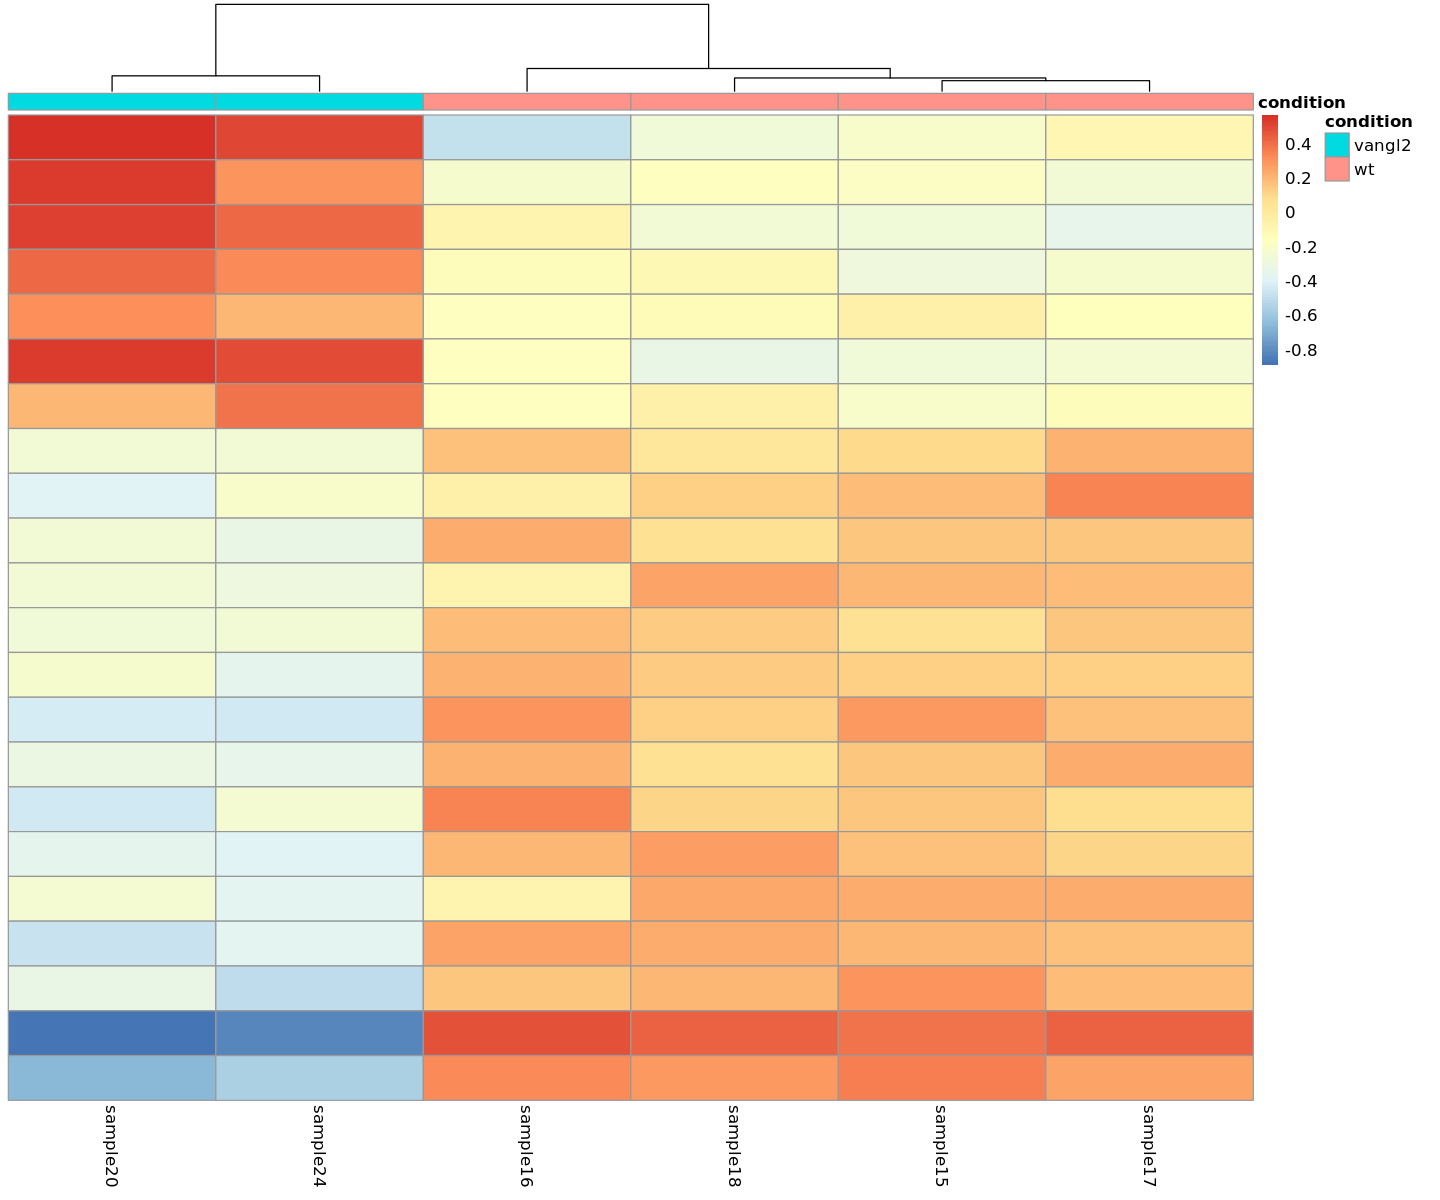

In [35]:
allDEGenes_vangl2<-resSig_vangl2[ order(-resSig_vangl2$log2FoldChange), ]

pretty_heatmap_all<-function(allDEGenes, samples, filename){
    matall<-(assay(vsd)[rownames(allDEGenes), rownames(samples)])
    matall  <- matall - rowMeans(matall)
    anno <- as.data.frame(colData(vsd)[rownames(samples), "condition", drop=FALSE]) # drop=FALSE allows you to select just one column of dataframe
    library(pheatmap)
    labels_col = c(colData(vsd)[rownames(samples), "samplename"])
    pheatmap(matall, annotation_col = anno, labels_col = labels_col, cluster_rows=FALSE, show_rownames=FALSE)
    #pheatmap(matall, annotation_col = anno, labels_col = labels_col, cluster_rows=FALSE, show_rownames=FALSE, filename = filename)
}

pretty_heatmap_all(allDEGenes_vangl2, vangl2wt_samples, "deseq2_trimmed_outputs_CELseq_vangl2/allDEpadj0.1_heatmap_vangl2_wt.pdf")

## Volcano plot

Warning message:
“Removed 1450 rows containing missing values (geom_text).”


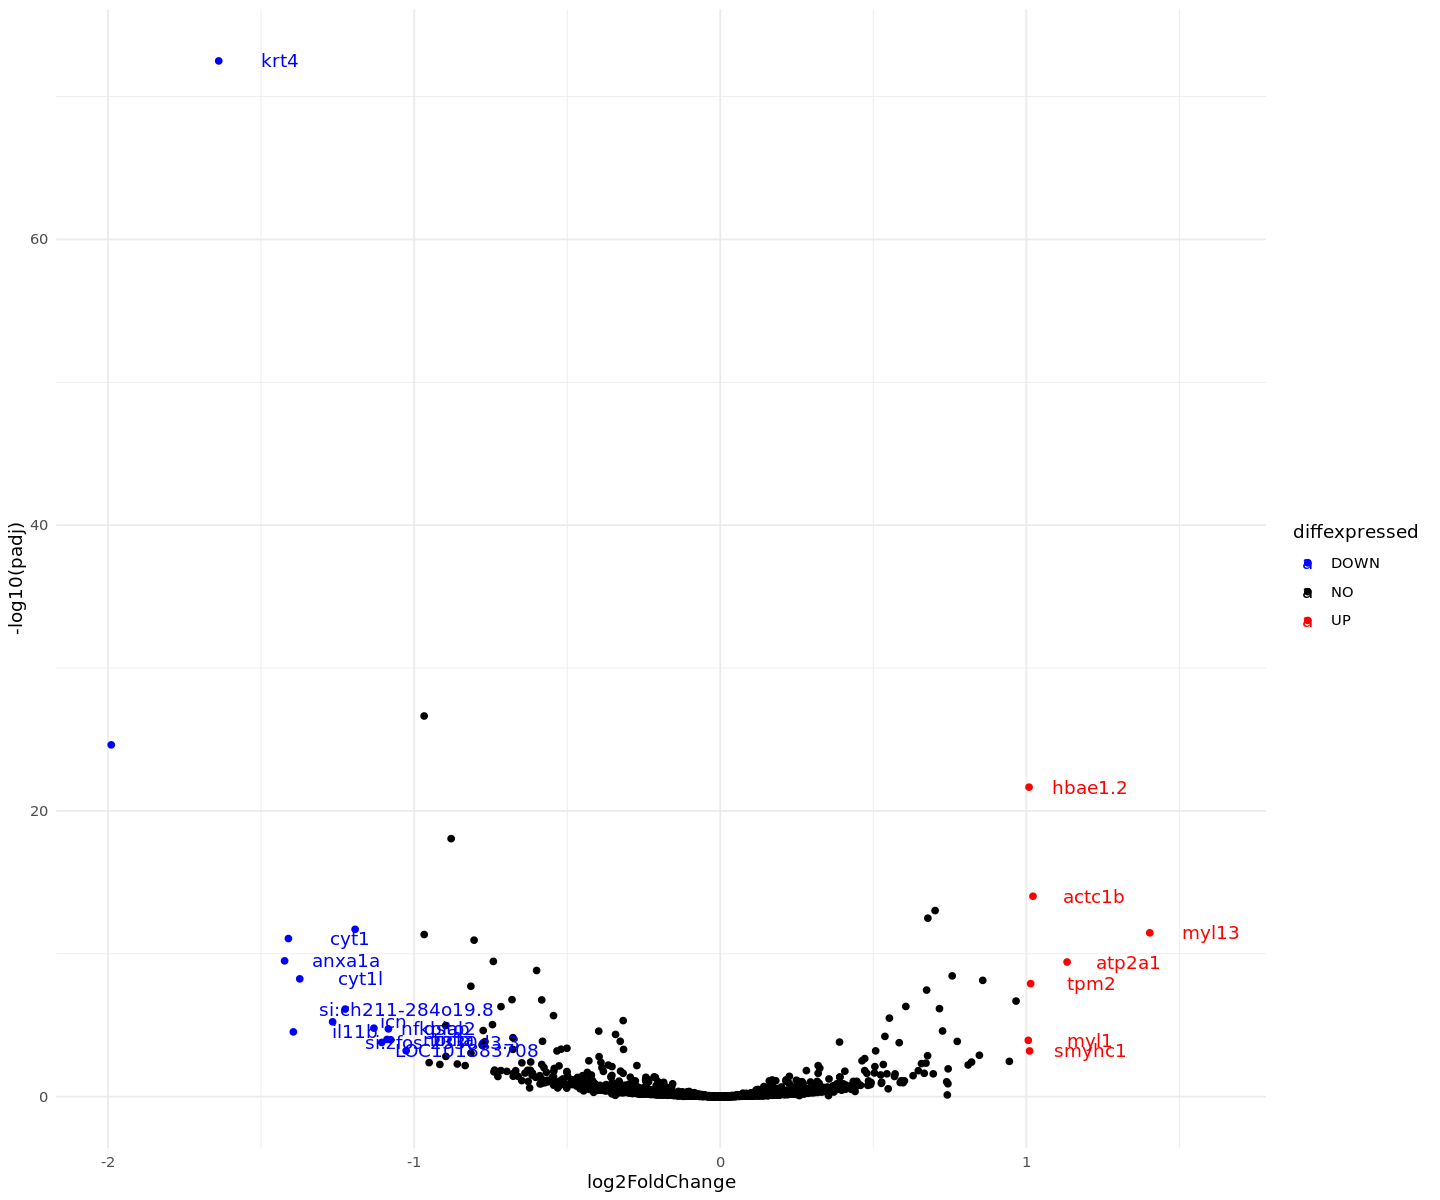

Saving 6.67 x 6.67 in image

Warning message:
“Removed 1450 rows containing missing values (geom_text).”
Saving 6.67 x 6.67 in image

Warning message:
“Removed 1450 rows containing missing values (geom_text).”
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning message:
“Removed 1450 rows containing missing values (geom_text).”
Saving 6.67 x 6.67 in image



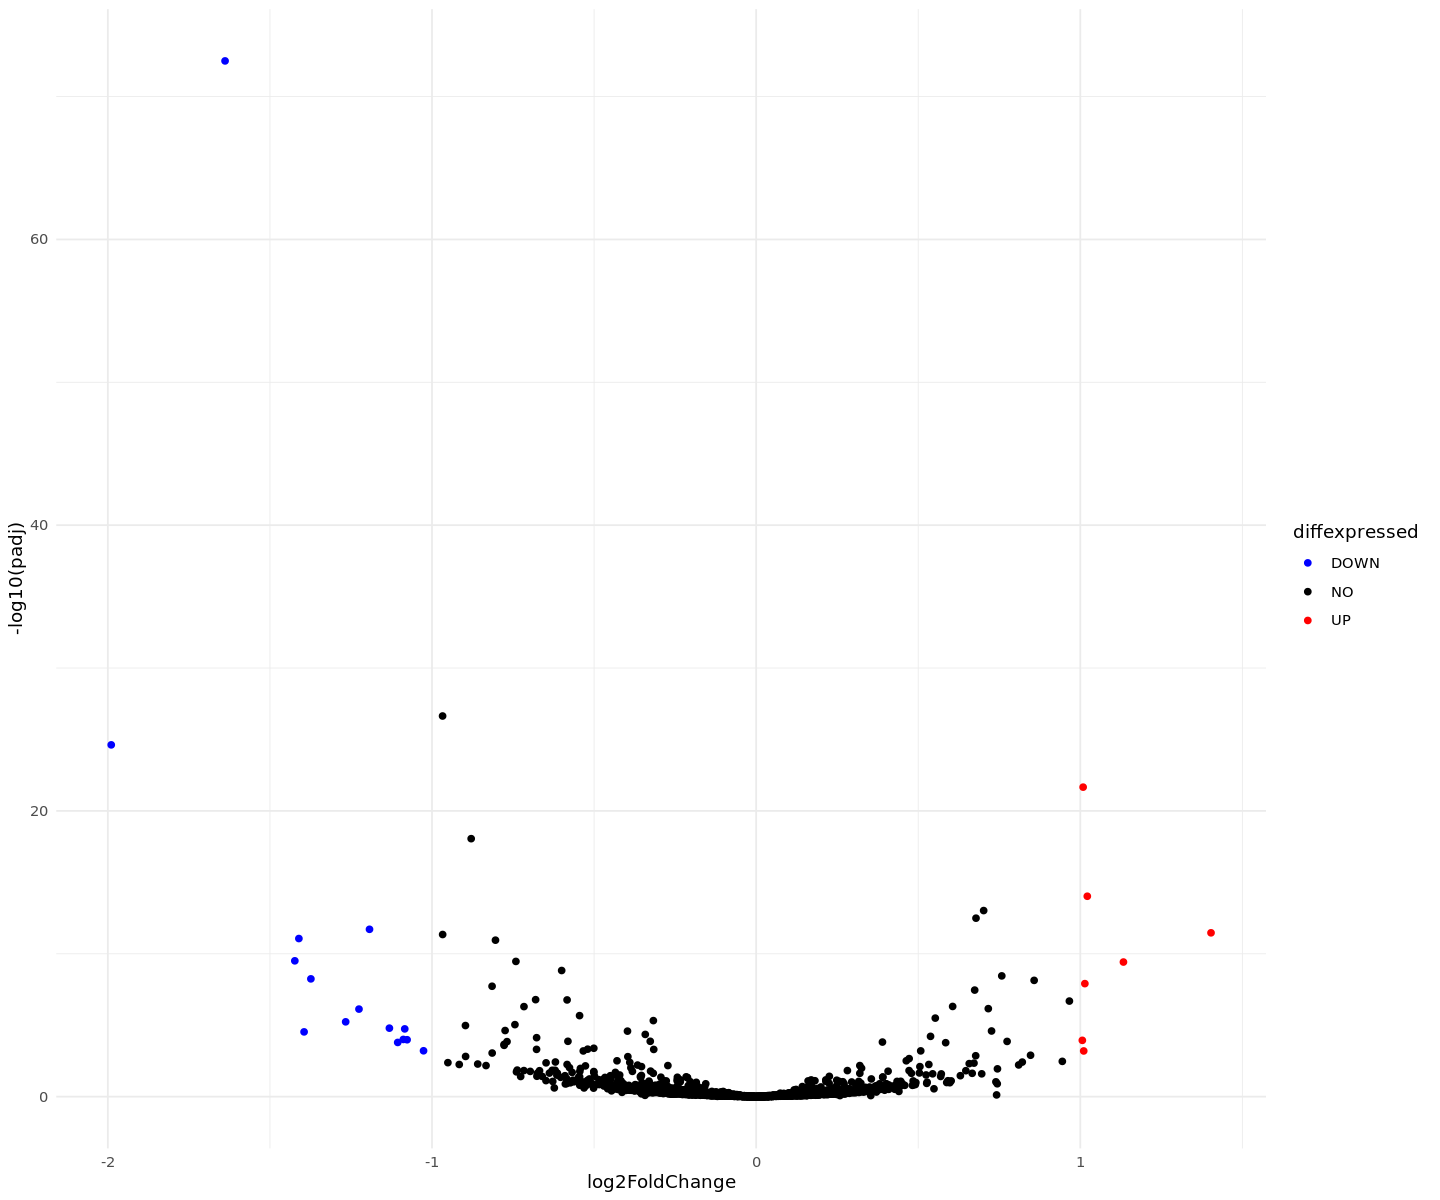

In [36]:
## volcano plot
de_vangl2<-data.frame(subset(res_vangl2, padj != 0))
de_vangl2$delabel <- NA
de_vangl2$symbol <- as.factor(de_vangl2$symbol)
# add a column of NAs
de_vangl2$diffexpressed <- "NO"
# if log2Foldchange > 0.6 and pvalue < 0.05, set as "UP" 
de_vangl2$diffexpressed[de_vangl2$log2FoldChange > 1 & de_vangl2$padj < 0.05] <- "UP"
# if log2Foldchange < -1 and pvalue < 0.05, set as "DOWN"
de_vangl2$diffexpressed[de_vangl2$log2FoldChange < -1 & de_vangl2$padj < 0.05] <- "DOWN"
#de$diffexpressed[de$log2FoldChange > 1 & de$padj < 0.05] <- "UP"
#de$delabel[de$log2FoldChange > 5 | -log10(de$padj) > 40] <-"UP"
de_vangl2$delabel[de_vangl2$log2FoldChange > 1 & (de_vangl2$padj) < 0.05] <- as.character(de_vangl2$symbol[de_vangl2$log2FoldChange > 1 & (de_vangl2$padj) < 0.05])
de_vangl2$delabel[(de_vangl2$log2FoldChange < -1) ] <- as.character(de_vangl2$symbol[(de_vangl2$log2FoldChange < -1) ])
plot<-ggplot(data=de_vangl2, aes(x=log2FoldChange, y=-log10(padj), col=diffexpressed, label=delabel)) + 
    geom_point() + 
    theme_minimal() +
    geom_text(nudge_x = 0.2) +
scale_color_manual(values=c("blue", "black", "red"))
plot
plot2<-ggplot(data=de_vangl2, aes(x=log2FoldChange, y=-log10(padj), col=diffexpressed)) + 
    geom_point() + 
    theme_minimal() +
scale_color_manual(values=c("blue", "black", "red"))
plot2
ggsave(filename = "deseq2_trimmed_outputs_CELseq_vangl2/volcanoallDElogFC1padj0.05_vangl2_wt.pdf", plot=plot)
ggsave(filename = "deseq2_trimmed_outputs_CELseq_vangl2/celseq_volcanoallDElogFC1padj0.05_vangl2_wt.pdf", plot=plot)
ggsave(filename = "deseq2_trimmed_outputs_CELseq_vangl2/celseq_nolab_volcanoallDElogFC1padj0.05_vangl2_wt.pdf", plot=plot2)
ggsave(filename = "macrogen_and_celseq_analysisv2_200824/deseq2_CELseq_vangl2/celseq_volcanoallDElogFC1padj0.05_vangl2_wt.pdf", plot=plot)
ggsave(filename = "macrogen_and_celseq_analysisv2_200824/deseq2_CELseq_vangl2/celseq_nolab_volcanoallDElogFC1padj0.05_vangl2_wt.pdf", plot=plot2)

In [105]:
### write results table

In [37]:
resSigOrdered_vangl2 <- resSig_vangl2[order(-resSig_vangl2$log2FoldChange),]
resSigOrderedDF_vangl2 <- as.data.frame(resSigOrdered_vangl2)
head(resSigOrderedDF_vangl2)
#write.csv(resSigOrderedDF_vangl2, file = "deseq2_trimmed_outputs_CELseq_vangl2/resultsDElogFC1padj0.05_vangl2_wt.csv")
write.csv(resSigOrderedDF_vangl2, file = "deseq2_trimmed_outputs_CELseq_vangl2/celseq_resultsDElogFC1padj0.05_vangl2_wt.csv")
write.csv(resSigOrderedDF_vangl2, file = "macrogen_and_celseq_analysisv2_200824/deseq2_CELseq_vangl2/celseq_resultsDElogFC1padj0.05_vangl2_wt.csv")

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol,entrez
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ENSDARG00000042245,214.54401,1.403241,0.18388188,7.631211,2.325588e-14,3.418614e-12,myl13,393488
ENSDARG00000020574,220.92218,1.133067,0.16343846,6.932686,4.129252e-12,3.793750e-10,atp2a1,260440
ENSDARG00000099197,496.84782,1.021583,0.12136435,8.417491,3.846340e-17,9.423533e-15,actc1b,58114
ENSDARG00000104682,221.76148,1.014047,0.15891586,6.381030,1.759014e-10,1.231310e-08,tpm2,415209
ENSDARG00000099959,80.16054,1.010519,0.24110169,4.191257,2.774129e-05,6.342910e-04,smyhc1,321552
ENSDARG00000088330,712.24729,1.008737,0.09777681,10.316730,5.920545e-25,2.175800e-22,hbae1.2,572729


In [38]:
save.image(file = "DESeq2_trimmed_notebook_CELseq_vangl2.RData")